In [1]:
# Import the standard stuff
import pandas as pd
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [2]:
# Import dataset
df = pd.read_csv("CollegeScorecard.csv")
df.head()

/Users/wendy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232


In [3]:
#Select the columns that we use for clustering
#Variables: School ID, Completion rate,Average cost of attendance (academic year institutions)
#The proportion of undergraduates who received a Pell grant
#Instructional expenditures per full-time equivalent student
#Proportion of faculty that is full-time
#Average faculty salary
#Share of students who received a federal loan/Pell Grant while in school
#Percentage of students who are financially independent and have family incomes between $0-30,000
Selected = df[['UNITID',
               'C150_4',
               'PFTFAC',
               'TUITFTE',
               'INEXPFTE',
               'AVGFACSAL',
               'PCTPELL',
               'NPT4_PUB',
               'NPT4_PRIV',
               'LOCALE',
               'PREDDEG',
               'LO_INC_RPY_3YR_RT_SUPP',
               'DEP_INC_PCT_LO',
               'IND_INC_PCT_LO',
               'GRAD_DEBT_MDN10YR',
               'NOTFIRSTGEN_DEBT_MDN',
               'FIRSTGEN_RPY_3YR_RT_SUPP',
               'NOTFIRSTGEN_RPY_3YR_RT_SUPP',
               'PELL_DEBT_MDN',
               'FIRSTGEN_DEBT_MDN',
               
]]
Selected

,UNITID,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,NPT4_PUB,NPT4_PRIV,LOCALE,PREDDEG,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN
0,100654,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,13415.0,NaN,12.0,3,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186
1,100663,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,14805.0,NaN,12.0,3,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541
2,100690,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,NaN,7455.0,12.0,3,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692
3,100706,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,17520.0,NaN,12.0,3,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446
4,100724,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,11936.0,NaN,12.0,3,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7800,48285704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7801,48285705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7802,48285706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875


In [4]:
# Combine column NPT4_PUB and NPT4_PRIV for further cleaning purpose
Selected['NPT4']= Selected['NPT4_PUB'].fillna(0) + Selected['NPT4_PRIV'].fillna(0)
Selected = Selected.drop(columns = ['NPT4_PUB','NPT4_PRIV'])

Selected

<ipython-input-4-edb9b8d3133d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected['NPT4']= Selected['NPT4_PUB'].fillna(0) + Selected['NPT4_PRIV'].fillna(0)


,UNITID,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,LOCALE,PREDDEG,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN,NPT4
0,100654,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,12.0,3,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186,13415.0
1,100663,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,12.0,3,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541,14805.0
2,100690,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,12.0,3,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692,7455.0
3,100706,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,12.0,3,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446,17520.0
4,100724,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,12.0,3,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000,11936.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7800,48285704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7801,48285705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7802,48285706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0


In [5]:
#Clean data (drop the PrivacySuppressed and NA)
Selected = Selected.replace('PrivacySuppressed',np.nan)
SelectedClean = Selected.dropna()
SelectedClean

,UNITID,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,LOCALE,PREDDEG,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN,NPT4
0,100654,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,12.0,3,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186,13415.0
1,100663,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,12.0,3,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541,14805.0
2,100690,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,12.0,3,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692,7455.0
3,100706,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,12.0,3,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446,17520.0
4,100724,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,12.0,3,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000,11936.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,0.2247,0.1136,17432.0,3886.0,6588.0,0.4802,12.0,3,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,19151.0
7368,482662,0.2903,0.2195,15865.0,4434.0,5715.0,0.5855,21.0,3,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,17667.0
7369,482671,0.0000,0.0294,15898.0,4019.0,5202.0,0.6125,11.0,3,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,20867.0
7370,482680,0.2597,0.8824,4149.0,4614.0,5492.0,0.3793,31.0,3,0.83064516129,0.31368129,0.739637827,182.88406965,7500,0.859813084112,0.854381443299,8763,7500,14534.0


In [6]:
#Drop the UNITID for PCA 
SelectedClean = SelectedClean.drop(columns =['UNITID'])


In [7]:
#Scale the data use MinMaxScalar
scaler = MinMaxScaler()
scaler.fit(SelectedClean)
scaled_data = scaler.transform(SelectedClean)
scaled_data

array([[0.31219199, 0.88316993, 0.23550607, ..., 0.59825726, 0.52325424,
        0.31137572],
       [0.576066  , 0.90870098, 0.23469332, ..., 0.53884263, 0.43359322,
        0.34363902],
       [0.71427041, 0.6651348 , 0.3166179 , ..., 0.24897228, 0.30311864,
        0.17303809],
       ...,
       [0.        , 0.00878268, 0.4206762 , ..., 0.64865957, 0.61564407,
        0.48434417],
       [0.27823013, 0.87990196, 0.10237863, ..., 0.18794139, 0.16101695,
        0.33734884],
       [0.1603814 , 0.51082516, 0.02183572, ..., 0.14312568, 0.1440678 ,
        0.18141726]])

In [8]:
#The dimension is high, I choose to use PCA to reduce it. 
pca = PCA(n_components = 18)
pca.fit(scaled_data)

print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[-2.35420509e-01 -3.52914472e-01  8.35240306e-03 -9.91836727e-02
  -1.58802280e-01  2.85992924e-01 -9.44661149e-02 -2.41860901e-01
  -3.75404589e-01  3.31247379e-01  1.18431402e-01  1.22878575e-02
  -1.41252862e-01 -3.80420583e-01 -3.86224459e-01 -1.86362371e-01
  -1.48889310e-01 -1.09468476e-02]
 [-9.47434360e-02  4.17674041e-01 -3.38051973e-01 -3.49894756e-02
  -3.83282462e-02 -7.53832263e-03  4.41657047e-01 -4.97843220e-02
   2.71235052e-02  5.41303227e-02  6.43332841e-02 -2.84556186e-01
  -3.33921869e-01  3.07814005e-02  3.00207965e-02 -3.40994630e-01
  -3.21141742e-01 -2.83662980e-01]
 [-9.97752571e-02 -3.20226056e-01  4.61553139e-02 -6.30512484e-02
  -1.23771490e-01  2.67090201e-02  8.49231582e-01  5.75179174e-02
  -6.20525632e-02 -9.49556989e-02 -1.25877004e-01  2.11292772e-01
   1.42001985e-01 -2.62940894e-02 -8.57112029e-03  1.43687188e-01
   1.44610948e-01  7.08134984e-02]
 [-1.27250877e-01  6.68791087e-01 -1.19826981e-02 -3.05383396e-02
  -8.70

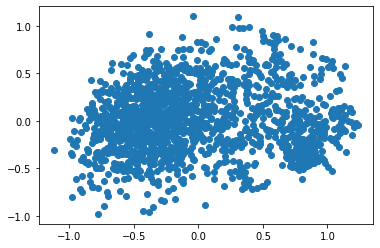

In [9]:
#0.3122 and 0.1216 explaining substantially more variances than other components. So I plot it.

df = pca.transform(scaled_data)
plt.scatter(df[:,0], df[:,1])

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
cluster_kmeans = kmeans.predict(df)

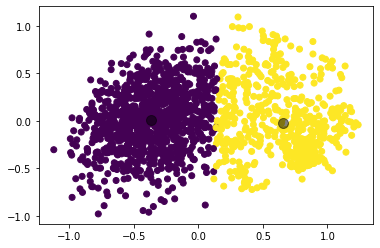

In [11]:
# Use cluster_means as the indicator for clusters
plt.scatter(df[:, 0], df[:, 1], c=cluster_kmeans, cmap='viridis') 

centers = kmeans.cluster_centers_

# plotting the centers onto scatter plot
# c is for color, s is for dot size, and alpha is for transparency
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5); 

In [12]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(df, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.32043272486565766


In [13]:
#Visualize Silhouette coefficient for each
from yellowbrick.cluster import SilhouetteVisualizer

smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure.

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (/Users/wendy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/__init__.py)